<a href="https://colab.research.google.com/github/Keerthana09022001/Machine-Learning/blob/main/Stock_Price_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Stock Price Prediction using Machine Learning

In [ ]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Importing Dataset(We will use OHLC(‘Open’, ‘High’, ‘Low’, ‘Close’) data from 1st January 2010 to 31st December 2017 which is for 8 years for the Tesla stocks.)
df = pd.read_csv('/content/drive/MyDrive/ML_dataset/DAV/Tesla.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [ ]:
# check initial 3 records
df.head(3)

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999


In [ ]:
# Information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [ ]:
# Stats behind our dataframe
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


# Exploratory Data Analysis(EDA)

EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summeries and grahical representaions.

While performing the EDA of the Tesla Stock Price data we will analyze how prices of the stock have moved over the period of time and how the end of the quarters affects the prices of the stock.


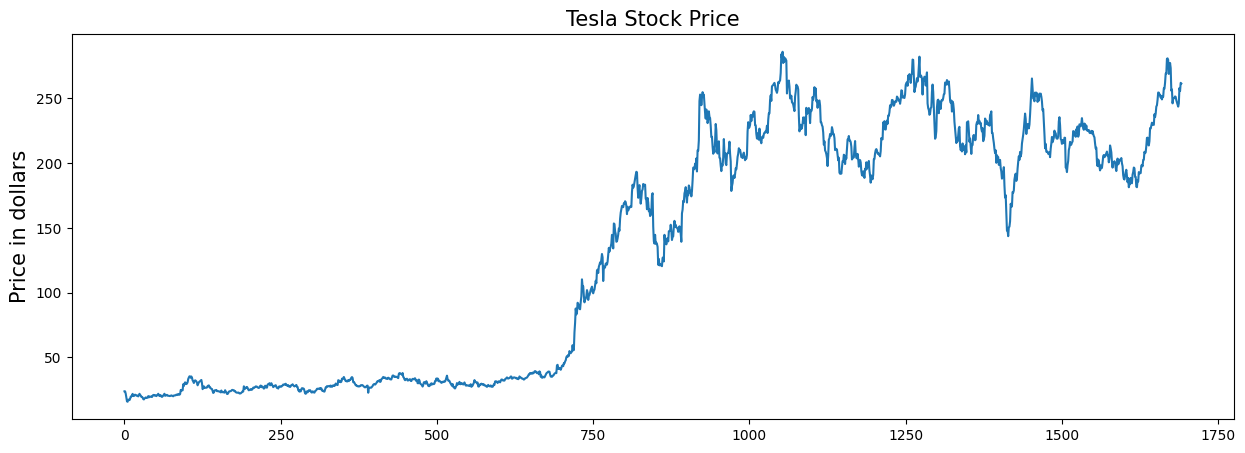

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Stock Price', fontsize=15)
plt.ylabel('Price in dollars', fontsize=15)
plt.show()

# The prices of tesla stocks are showing an upward trend as depicted by the plot of the closing price of the stocks.

In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Adj Close,0


In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


If we observe carefully we can see that the data in the "Close" column and "Adj Close" column is the same let's check whether this is the case with each row or not

In [ ]:
df[df['Close'] == df['Adj Close']].shape

(1692, 7)

In [ ]:
# From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data.
# So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis
df = df.drop(['Adj Close'], axis=1)


In [ ]:
# moving further let’s check for the null values if any are present in the data frame.
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


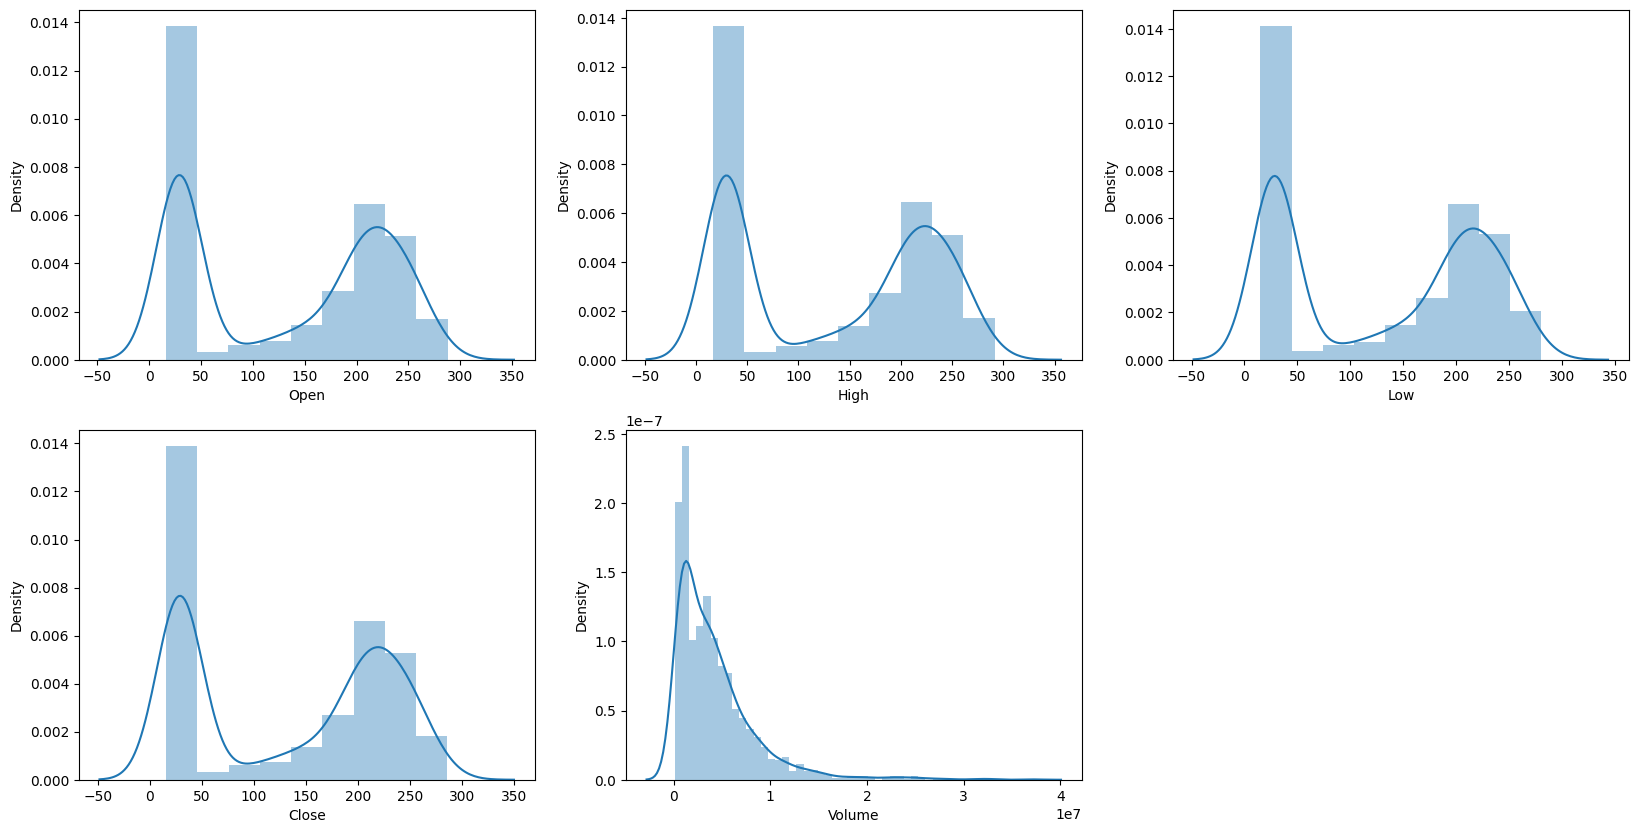

In [ ]:
# let’s draw the distribution plot for the continuous features given in the dataset.
features = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()

In the distribution plot f OHLC data, we can see two peaks which means the data has varied significantly in two regions. And the Volume data is left-skewed.


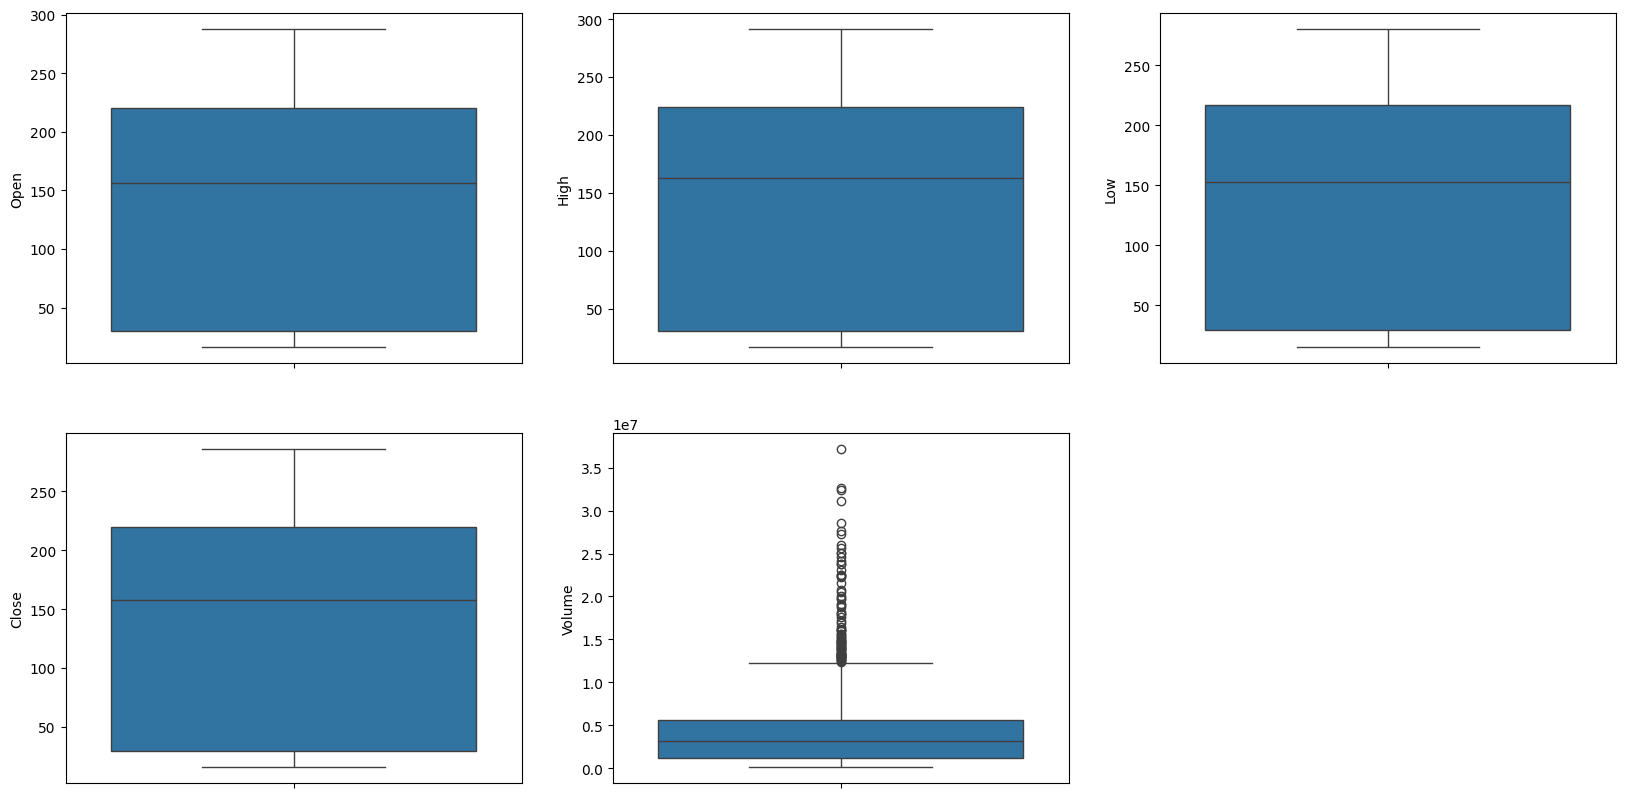

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
plt.show()

The above boxplots, we can conclude that only volume data contains outliers in it but the data in the rest of the columns are free from any outlier.

##Feature Engineering:

Feature Engineering:
Feature Engineering helps to derive some valuable features from the existing ones.

In [ ]:
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1692 non-null   datetime64[ns]
 1   Open            1692 non-null   float64       
 2   High            1692 non-null   float64       
 3   Low             1692 non-null   float64       
 4   Close           1692 non-null   float64       
 5   Volume          1692 non-null   int64         
 6   year            1692 non-null   int32         
 7   month           1692 non-null   int32         
 8   day             1692 non-null   int32         
 9   is_quarter_end  1692 non-null   int64         
 10  open-close      1692 non-null   float64       
 11  low-high        1692 non-null   float64       
 12  target          1692 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int32(3), int64(3)
memory usage: 152.1 KB


In [ ]:
# splitted = df['Date'].str.split('/', expand=True)

# df['day'] = splitted[1].astype('int')
# df['month'] = splitted[0].astype('int')
# df['year'] = splitted[2].astype('int')

# df.head()

Now we have three more columns namely day, month and year all these three have been derived from the ‘Date’ column which was initially provided in the data.





In [ ]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,2010,6,29,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,2010,6,30,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,2010,7,1,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2010,7,2,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,2010,7,6,0


A quarter is defined as a group of three months. Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance. These quarterly results affect the stock prices heavily which is why we have added this feature because this can be a helpful feature for the learning model.

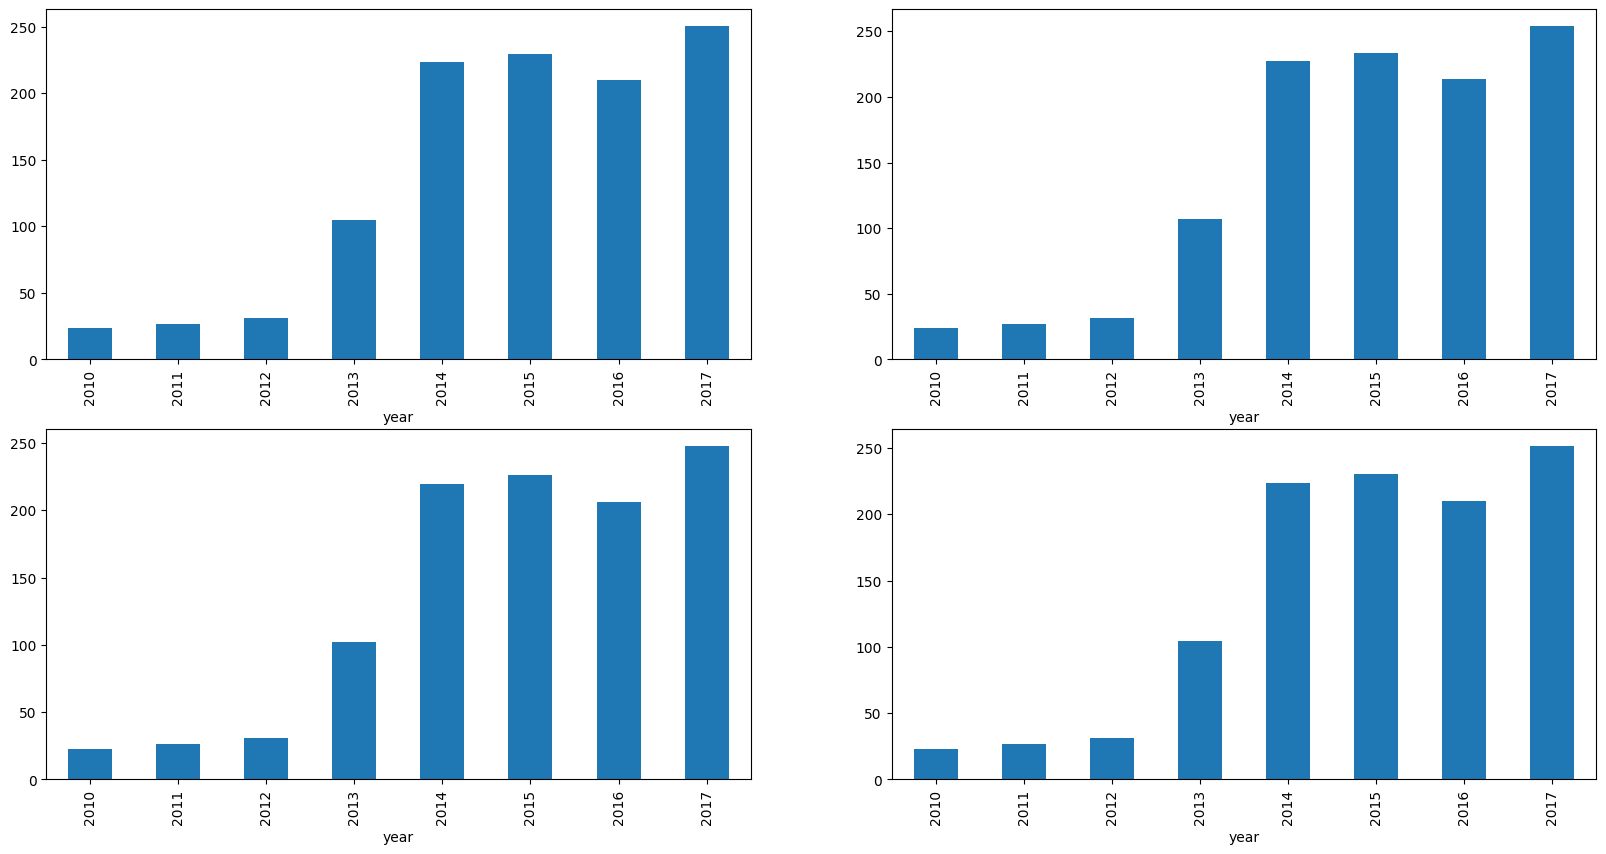

In [ ]:
data_grouped = df.drop('Date', axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

From the above bar graph, we can conclude that the stock prices have doubled
from the year 2013 to that in 2014.



Here are some of the important observations of the above-grouped data:

Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.
The volume of trades is lower in the months which are quarter end





In [ ]:
df.drop('Date', axis=1).groupby('is_quarter_end').mean()


,Open,High,Low,Close,Volume,year,month,day
is_quarter_end,,,,,,,,
0,130.813739,133.182620,128.257229,130.797709,4.461581e+06,2013.353464,6.141208,15.686501
1,135.679982,137.927032,133.455777,135.673269,3.891084e+06,2013.314488,7.584806,15.657244


Here are some of the important observations of the above-grouped data:

Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.

The volume of trades is lower in the months which are quarter end.

In [ ]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

df.head(5)

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end,open-close,low-high,target
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,2010,6,29,1,-4.889999,-7.459999,0
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,2010,6,30,1,1.960001,-7.120001,0
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,2010,7,1,0,3.040001,-5.650000,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2010,7,2,0,3.799999,-4.390001,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,2010,7,6,0,3.889999,-4.170000,0


Above we have added some more columns which will help in the training of our model. We have added the target feature which is a signal whether to buy or not we will train our model to predict this only.
The condition checks whether the next period's closing price is higher than the current period's closing price.
If the condition is true (i.e., the next day's closing price is higher), it assigns a value of 1 (indicating an upward trend), otherwise it assigns a value of 0

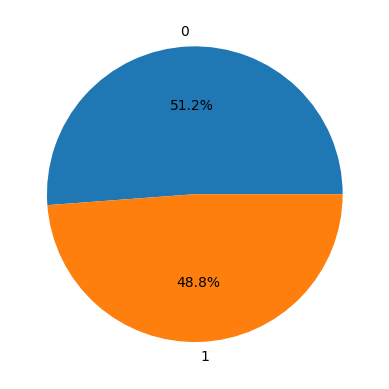

In [ ]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

# When we add features to our dataset we have to ensure that there are no highly correlated features as they do not help in the learning process of the algorithm.

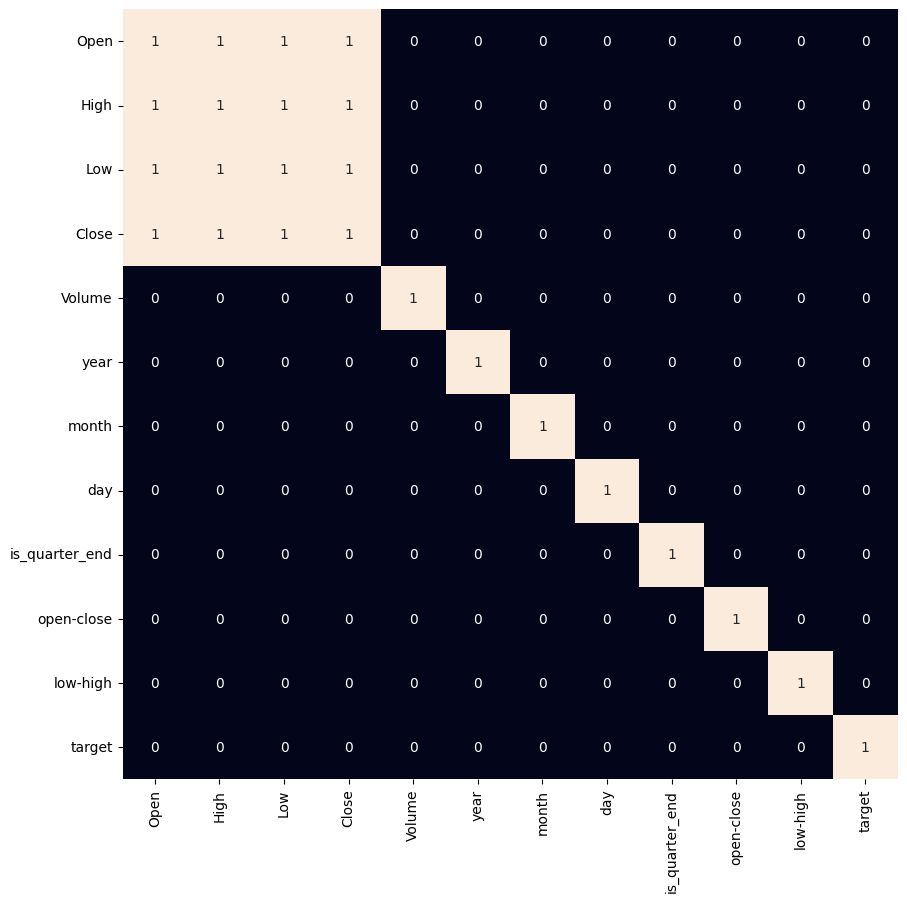

In [ ]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()


# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only

From the above heatmap, we can say that there is a high correlation between OHLC that is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.

##Data Splitting and Normalization

In [ ]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)



(1522, 3) (170, 3)


After selecting the features to train the model on we should normalize the data because normalized data leads to stable and fast training of the model.

## Model Development and Evaluation

In [ ]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()


LogisticRegression() : 
Training Accuracy :  0.5191606217616581
Validation Accuracy :  0.5436730123180291

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.47150086355785836
Validation Accuracy :  0.4454787234042553

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

# Use MinMaxScaler to scale features to a range between 0 and 1
from sklearn.preprocessing import MinMaxScaler

models = [
    LogisticRegression(),
    SVC(kernel='poly', probability=True),
    XGBClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    MultinomialNB()
]

# Loop through each model
for model in models:
    # Scale data using MinMaxScaler for MultinomialNB
    if model.__class__.__name__ == 'MultinomialNB':
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_valid_scaled = scaler.transform(X_valid)
        model.fit(X_train_scaled, Y_train)
    else:
        model.fit(X_train, Y_train)

    # Print model name
    print(f'{model.__class__.__name__} : ')

    # Check if the model has `predict_proba`
    if hasattr(model, 'predict_proba'):
        if model.__class__.__name__ == 'MultinomialNB':
            print('Training AUC: ', roc_auc_score(Y_train, model.predict_proba(X_train_scaled)[:, 1]))
            print('Validation AUC: ', roc_auc_score(Y_valid, model.predict_proba(X_valid_scaled)[:, 1]))
        else:
            print('Training AUC: ', roc_auc_score(Y_train, model.predict_proba(X_train)[:, 1]))
            print('Validation AUC: ', roc_auc_score(Y_valid, model.predict_proba(X_valid)[:, 1]))
    else:
        print(f'{model.__class__.__name__} does not support predict_proba.')

    print()

LogisticRegression : 
Training AUC:  0.5191606217616581
Validation AUC:  0.5436730123180291

SVC : 
Training AUC:  0.4723229706390328
Validation AUC:  0.44792833146696526

XGBClassifier : 
Training AUC:  0.9644602763385148
Validation AUC:  0.572998320268757

DecisionTreeClassifier : 
Training AUC:  1.0
Validation AUC:  0.5384938409854423

RandomForestClassifier : 
Training AUC:  1.0
Validation AUC:  0.5345744680851064

KNeighborsClassifier : 
Training AUC:  0.7475993091537133
Validation AUC:  0.4991601343784995

MultinomialNB : 
Training AUC:  0.5079671848013817
Validation AUC:  0.4673852183650616



Among the three models, we have trained XGBClassifier has the highest performance.

**XGBoost** – This contains the eXtreme Gradient Boosting machine learning algorithm which is one of the algorithms which helps us to achieve high accuracy on predictions

**Overfitting models**: DecisionTreeClassifier and RandomForestClassifier are overfitting, as indicated by perfect AUC scores on training but much lower AUCs on validation.


**XGBClassifier** has the best balance between training and validation performance, though it is still overfitting somewhat.

**LogisticRegression and SVC** both have low AUCs on both training and validation sets, making them poor choices for this task.

**KNeighborsClassifier and MultinomialNB **have poor validation AUCs, making them ineffective for this problem.

In conclusion, the **XGBClassifier** is performing the best, but it would benefit from further tuning to reduce overfitting. You may want to explore hyperparameter tuning, regularization, or using cross-validation for better results.

##1. Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Example with XGBClassifier and cross-validation
for model in models:
    # If MultinomialNB, scale the features
    if model.__class__.__name__ == 'MultinomialNB':
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        cv_scores = cross_val_score(model, X_train_scaled, Y_train, cv=5, scoring='roc_auc')
    else:
        cv_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='roc_auc')

    print(f'{model.__class__.__name__} Cross-Validation AUC: {cv_scores.mean():.4f}')


LogisticRegression Cross-Validation AUC: 0.5123
SVC Cross-Validation AUC: 0.4863
XGBClassifier Cross-Validation AUC: 0.5099
DecisionTreeClassifier Cross-Validation AUC: 0.5013
RandomForestClassifier Cross-Validation AUC: 0.5037
KNeighborsClassifier Cross-Validation AUC: 0.4985
MultinomialNB Cross-Validation AUC: 0.5081


##2 Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define parameter grid for XGBClassifier
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

xgb_model = xgb.XGBClassifier()
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, Y_train)

# Best parameters and model
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Training AUC: {grid_search.best_score_}')


Best Parameters: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}
Best Training AUC: 0.5140152492668622


##3. Regularization

In [ ]:
from sklearn.linear_model import LogisticRegression

# Add regularization (L2) to Logistic Regression
log_reg_model = LogisticRegression(penalty='l2', C=1.0)  # 'C' controls the strength of regularization
log_reg_model.fit(X_train, Y_train)

# Evaluate using AUC
log_reg_auc = roc_auc_score(Y_valid, log_reg_model.predict_proba(X_valid)[:, 1])
print(f'LogisticRegression AUC with Regularization: {log_reg_auc}')

LogisticRegression AUC with Regularization: 0.5436730123180291


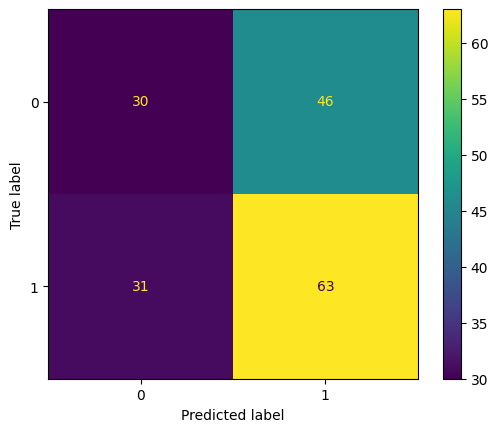

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()


